### **Задание на семинар:**
- построить собственный граф типа «сеть»
- найти максимальный поток
- найти все минимальные разрезы
- модернизировать граф, увеличив минимальный разрез
- убедиться, что поток по графу увеличился

Ссылка на видео-лекцию: https://www.youtube.com/watch?v=NJQo9Pv6sm0

Слайды лекции с математической постановкой задачи приложены.

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 74.2 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import pulp
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import copy
from collections import defaultdict

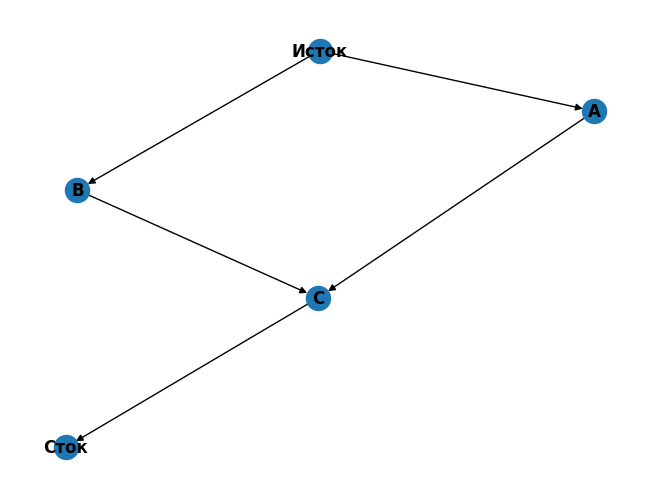

In [ ]:
# G = nx.DiGraph()             #ориентированный граф
# G.add_edge("Исток", "A", capacity=10)
# G.add_edge("Исток", "B", capacity=5)
# G.add_edge("A", "C", capacity=15)
# G.add_edge("B", "C", capacity=10)
# G.add_edge("C", "Сток", capacity=20)
# nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
G = {
    'Исток': {'A': 10, 'B': 5},
    'A': {'C': 15},
    'B': {'C': 10},
    'C': {'Сток': 20}
}

In [ ]:
source = 'Исток'
sink = 'Сток'

Реализация алгоритма Форда-Фалкерсона

In [ ]:
class FordFulkerson:
    def __init__(self, graph, source, sink):
        self.graph = graph
        self.source = source
        self.sink = sink
        self.visited = set()
        self.max_flow = 0

    def find_max_flow(self):
        path = self.dfs()
        while path:
            flow = min(self.graph[u][v] for u, v in path)
            self.max_flow += flow
            for u, v in path:
                self.graph[u][v] -= flow
                if v not in self.graph:
                    self.graph[v] = {}
                if u not in self.graph[v]:
                    self.graph[v][u] = 0
                self.graph[v][u] += flow
            self.visited.clear()
            path = self.dfs()

    def dfs(self):
        stack = [(self.source, [self.source])]
        while stack:
            node, path = stack.pop()
            for neighbor, capacity in self.graph[node].items():
                if neighbor not in path and capacity > 0:
                    if neighbor == self.sink:
                        path.append(neighbor)
                        return [(path[i], path[i+1]) for i in range(len(path) - 1)]
                    stack.append((neighbor, path + [neighbor]))
        return []

def find_min_cuts(graph, source, sink):
    ford_fulkerson = FordFulkerson(graph, source, sink)
    ford_fulkerson.find_max_flow()

    min_cuts = set()
    for u, edges in ford_fulkerson.graph.items():
        for v, capacity in edges.items():
            if capacity == 0 and ford_fulkerson.graph[v][u] > 0:
                min_cuts.add((u, v))

    return min_cuts

In [ ]:
min_cuts = find_min_cuts(G, source, sink)
print("Минимальные разрезы:", min_cuts)

Минимальные разрезы: {('Исток', 'B'), ('Исток', 'A')}


In [ ]:
ford_fulkerson = FordFulkerson(G, source, sink)
ford_fulkerson.find_max_flow()
max_flow_before = ford_fulkerson.max_flow
print("Максимальный поток:", max_flow_before)

Максимальный поток: 0


In [ ]:
#модернизация графа:увеличим пропускную способность ребра между "B" и "C"
G['B']['C'] += 5

In [ ]:
ford_fulkerson = FordFulkerson(G, source, sink)
ford_fulkerson.find_max_flow()
max_flow_after = ford_fulkerson.max_flow
print("Максимальный поток после модернизации:", max_flow_after )

Максимальный поток после модернизации: 0


In [ ]:
#убедиться, что поток увеличился
if max_flow_after > max_flow_before:
    print("Поток увеличился.")
else:
    print("Поток не изменился")

Поток не изменился
